# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [25]:
#Write your code here.
import pandas as pd
data = pd.read_csv(r'/content/Reviews.csv')
print(data)
data.head()


            Id  ...                                               Text
0            1  ...  I have bought several of the Vitality canned d...
1            2  ...  Product arrived labeled as Jumbo Salted Peanut...
2            3  ...  This is a confection that has been around a fe...
3            4  ...  If you are looking for the secret ingredient i...
4            5  ...  Great taffy at a great price.  There was a wid...
...        ...  ...                                                ...
568449  568450  ...  Great for sesame chicken..this is a good if no...
568450  568451  ...  I'm disappointed with the flavor. The chocolat...
568451  568452  ...  These stars are small, so you can give 10-15 o...
568452  568453  ...  These are the BEST treats for training and rew...
568453  568454  ...  I am very satisfied ,product is as advertised,...

[568454 rows x 10 columns]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
print(data.shape)

(568454, 10)


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [27]:
#You can write you answer here.
data.head()



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [29]:
pip install seaborn

In [30]:
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


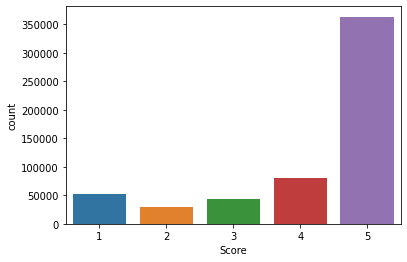

In [31]:
sns.countplot(data.Score)

In [32]:
data['Score'].head

<bound method NDFrame.head of 0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

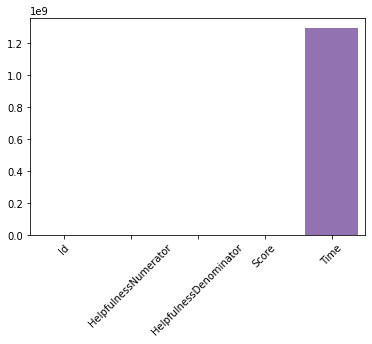

In [33]:
import matplotlib.pyplot as plt
sns.barplot(data= data)
plt.xticks(rotation=45)

In [34]:
import pandas as pd
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [35]:
# Special characters removal
data['After noise removal'] = data['Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
data['Punctuation removal'] = data['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
data['Remove numbers'] = data['Punctuation removal'].str.replace('\d+', '')

# Stopwords removal
stop_word = stopwords.words('english')
data['Stopwords removal'] = data['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
data['Lower casing'] = data['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
data['Tokenization'] = data['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
stemm = PorterStemmer()
data['Stemming'] = data['Tokenization'].apply(lambda x: " ".join([stemm.stem(word) for word in x]))

# Lemmatization
data['Lemmatization'] = data['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

data['Text']=data['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
data['Text']=data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I bought several Vitality canned dog food prod...,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...,i bought several vitality canned dog food prod...,"[i, bought, several, vitality, canned, dog, fo...",i bought sever vital can dog food product foun...,i bought sever vital can dog food product foun...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts.....,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts p...,product arrived labeled jumbo salted peanuts p...,"[product, arrived, labeled, jumbo, salted, pea...",product arriv label jumbo salt peanut peanut a...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This confection around centuries. It light, pi...",This is a confection that has been around a fe...,This is a confection that has been around a fe...,This is a confection that has been around a fe...,This confection around centuries It light pill...,this confection around centuries it light pill...,"[this, confection, around, centuries, it, ligh...",thi confect around centuri it light pillowi ci...,thi confect around centuri it light pillowi ci...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If looking secret ingredient Robitussin I beli...,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...,if looking secret ingredient robitussin i beli...,"[if, looking, secret, ingredient, robitussin, ...",if look secret ingredi robitussin i believ i f...,if look secret ingredi robitussin i believ i f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy great price. There wide assortment...,Great taffy at a great price There was a wid...,Great taffy at a great price There was a wid...,Great taffy at a great price There was a wid...,Great taffy great price There wide assortment ...,great taffy great price there wide assortment ...,"[great, taffy, great, price, there, wide, asso...",great taffi great price there wide assort yumm...,great taffi great price there wide assort yumm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great sesame chicken..this good better restura...,Great for sesame chicken this is a good if no...,Great for sesame chicken this is a good if no...,Great for sesame chicken this is a good if no...,Great sesame chicken good better resturants I ...,great sesame chicken good better resturants i ...,"[great, sesame, chicken, good, better, restura...",great sesam chicken good better restur i eaten...,great sesam chicken good better restur i eaten...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed flavor. The chocolate note es...,I m disappointed with the flavor The chocolat...,I m disappointed with the flavor The chocolat...,I m disappointed with the flavor The chocolat...,I disappointed flavor The chocolate notes espe...,i disappointed flavor the chocolate notes espe...,"[i, disappointed, flavor, the, chocolate, note...",i disappoint flavor the chocol note especi wea...,i d

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=20)
model.fit(data)

ValueError: ignored

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vect = tfidf_vect.fit_transform(data['Lemmatization'].values)
tfidf_vect.shape

(568454, 82575)

In [ ]:
Over my understanding about the clustering methods, all the methods that we have studeied with the datasets Herarchial clustering is nothing but the clusters inside the clusters, where as finding the hidden structures are very easy using this clustering method. DBSCAN refers to the density in finding the desity of unknown clusters. Upon all th eclusters K means clustrs calcualte each point in the dataset and uses it for iteration. Overall large data sets we use DBSCAN, K also good for large datasets.